In [1]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [33]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex, num_inequalities=3, inequality_start_id=0):

    opt_dicts = []
    for i in range(inequality_start_id,num_inequalities):

        file_regex = resource_regex + "_I_" + str(i) + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## 3->22->33 Broadcast Data Analysis

In [46]:
data_path = "../data/3-22-33_broadcast_violations/"

eacc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"eacc_bc_arb", num_inequalities=7, inequality_start_id=1)
eaqc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"eaqc_bc_arb", num_inequalities=7, inequality_start_id=1)
earx_qc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"earx_qc_bc_arb", num_inequalities=7, inequality_start_id=1)
gea_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"gea3_bc_arb", num_inequalities=7, inequality_start_id=1)
ghza_cc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"ghzacc_bc_arb", num_inequalities=7, inequality_start_id=1)
ghza_qc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"ghzaqc_bc_arb", num_inequalities=7, inequality_start_id=1)
onesided_eaqc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_arb", num_inequalities=7, inequality_start_id=1)
onesided_eaqc_bc_sep_opt_dicts3 = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_sep", num_inequalities=7, inequality_start_id=1) # no entanglement is needed for max violation

onesided2_eaqc_bc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"onesided2_eaqc_bc_arb", num_inequalities=7, inequality_start_id=1)
qbc_arb_opt_dicts3 = get_inequality_opt_dicts(data_path, r"qbc_arb", num_inequalities=7, inequality_start_id=1)

print(len(eacc_bc_arb_opt_dicts3))

6


## 4->22->44 broadcast Data Analysis

In [71]:
data_path = "../data/4-22-44_broadcast_violations/"

eacc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"eacc_bc_arb")
eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"eaqc_bc_arb")
earx_cc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"earx_cc_bc_arb")
earx_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"earx_qc_bc_arb")
gea_cc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"gea_cc_bc_arb")
gea_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"gea_qc_bc_arb")

ghza_cc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"ghza_cc_bc_arb")
ghza_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"ghza_qc_bc_arb")
onesided_eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_arb")
# onesided_eaqc_bc_sep_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_sep") # no entanglement is needed for max violation
onesided2_eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided2_eaqc_bc_arb")
qbc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"qbc_arb")




len(ghza_qc_bc_arb_opt_dicts)

3

## Analyzing Data

In [72]:
broadcast_4_22_44_inequalities = mac.broadcast_4_22_44_network_bounds()

print(len(broadcast_4_22_44_inequalities))


def analyze_data(game_opt_dicts, inequalities, num_in=4):
    max_violations = []
    unscaled_max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(inequalities)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(num_in):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]
        unscaled_max_violations += [max([max(opt_dict["scores"]) for opt_dict in opt_dicts])]
        max_violations += [(unscaled_max_violations[i] - cbound) / (qbound - cbound) ]
        

    return max_violations, qbounds, cbounds, unscaled_max_violations


qbc_arb_max_violations, qbc_arb_qbounds, qbc_arb_cbounds, unscaled_qbc_arb_max_violations = analyze_data(qbc_arb_opt_dicts, broadcast_4_22_44_inequalities)

eacc_bc_arb_max_violations, eacc_bc_arb_qbounds, eacc_bc_arb_cbounds, unscaled_eacc_bc_arb_max_violations = analyze_data(eacc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
eaqc_bc_arb_max_violations, eaqc_bc_arb_qbounds, eaqc_bc_arb_cbounds, unscaled_eaqc_bc_arb_max_violations = analyze_data(eaqc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)

gea_cc_bc_arb_max_violations, gea_cc_bc_arb_qbounds, gea_cc_bc_arb_cbounds, unscaled_gea_cc_bc_arb_max_violations = analyze_data(gea_cc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
gea_qc_bc_arb_max_violations, gea_qc_bc_arb_qbounds, gea_qc_bc_arb_cbounds, unscaled_gea_qc_bc_arb_max_violations = analyze_data(gea_qc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)

ghza_cc_bc_arb_max_violations, ghza_cc_bc_arb_qbounds, ghza_cc_bc_arb_cbounds, unscaled_ghza_cc_bc_arb_max_violations = analyze_data(ghza_cc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
ghza_qc_bc_arb_max_violations, ghza_qc_bc_arb_qbounds, ghza_qc_bc_arb_cbounds, unscaled_ghza_qc_bc_arb_max_violations = analyze_data(ghza_qc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)


onesided_eaqc_bc_arb_max_violations, onesided_eaqc_bc_arb_qbounds, onesided_eaqc_bc_arb_cbounds, unscaled_onesided_eaqc_bc_arb_max_violations = analyze_data(onesided_eaqc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
onesided2_eaqc_bc_arb_max_violations, onesided2_eaqc_bc_arb_qbounds, onesided2_eaqc_bc_arb_cbounds, unscaled_onesided2_eaqc_bc_arb_max_violations = analyze_data(onesided2_eaqc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)

earx_cc_bc_arb_max_violations, earx_cc_bc_arb_qbounds, earx_cc_bc_arb_cbounds, unscaled_earx_cc_bc_arb_max_violations = analyze_data(earx_cc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
earx_qc_bc_arb_max_violations, earx_qc_bc_arb_qbounds, earx_qc_bc_arb_cbounds, unscaled_earx_qc_bc_arb_max_violations = analyze_data(earx_qc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)


3


In [49]:
broadcast_3_22_33_inequalities = mac.bipartite_broadcast_bounds()[1:]

qbc_arb_max_violations3, qbc_arb_qbounds3, qbc_arb_cbounds3, unscaled_qbc_arb_max_violations3 = analyze_data(qbc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)

eacc_bc_arb_max_violations3, eacc_bc_arb_qbounds3, eacc_bc_arb_cbounds3, unscaled_eacc_bc_arb_max_violations3 = analyze_data(eacc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)
eaqc_bc_arb_max_violations3, eaqc_bc_arb_qbounds3, eaqc_bc_arb_cbounds3, unscaled_eaqc_bc_arb_max_violations3 = analyze_data(eaqc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)

# gea_cc_bc_arb_max_violations3, gea_cc_bc_arb_qbounds3, gea_cc_bc_arb_cbounds3, unscaled_gea_cc_bc_arb_max_violations3 = analyze_data(gea_cc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)
gea_qc_bc_arb_max_violations3, gea_qc_bc_arb_qbounds3, gea_qc_bc_arb_cbounds3, unscaled_gea_qc_bc_arb_max_violations3 = analyze_data(gea_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)

ghza_cc_bc_arb_max_violations3, ghza_cc_bc_arb_qbounds3, ghza_cc_bc_arb_cbounds3, unscaled_ghza_cc_bc_arb_max_violations3 = analyze_data(ghza_cc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)
ghza_qc_bc_arb_max_violations3, ghza_qc_bc_arb_qbounds3, ghza_qc_bc_arb_cbounds3, unscaled_ghza_qc_bc_arb_max_violations3 = analyze_data(ghza_qc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)


onesided_eaqc_bc_arb_max_violations3, onesided_eaqc_bc_arb_qbounds3, onesided_eaqc_bc_arb_cbounds3, unscaled_onesided_eaqc_bc_arb_max_violations3 = analyze_data(onesided_eaqc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)
onesided2_eaqc_bc_arb_max_violations3, onesided2_eaqc_bc_arb_qbounds3, onesided2_eaqc_bc_arb_cbounds3, unscaled_onesided2_eaqc_bc_arb_max_violations3 = analyze_data(onesided2_eaqc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)

# earx_cc_bc_arb_max_violations3, earx_cc_bc_arb_qbounds3, earx_cc_bc_arb_cbounds3, unscaled_earx_cc_bc_arb_max_violations3 = analyze_data(earx_cc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)
earx_qc_bc_arb_max_violations3, earx_qc_bc_arb_qbounds3, earx_qc_bc_arb_cbounds3, unscaled_earx_qc_bc_arb_max_violations3 = analyze_data(earx_qc_bc_arb_opt_dicts3, broadcast_3_22_33_inequalities, num_in=3)


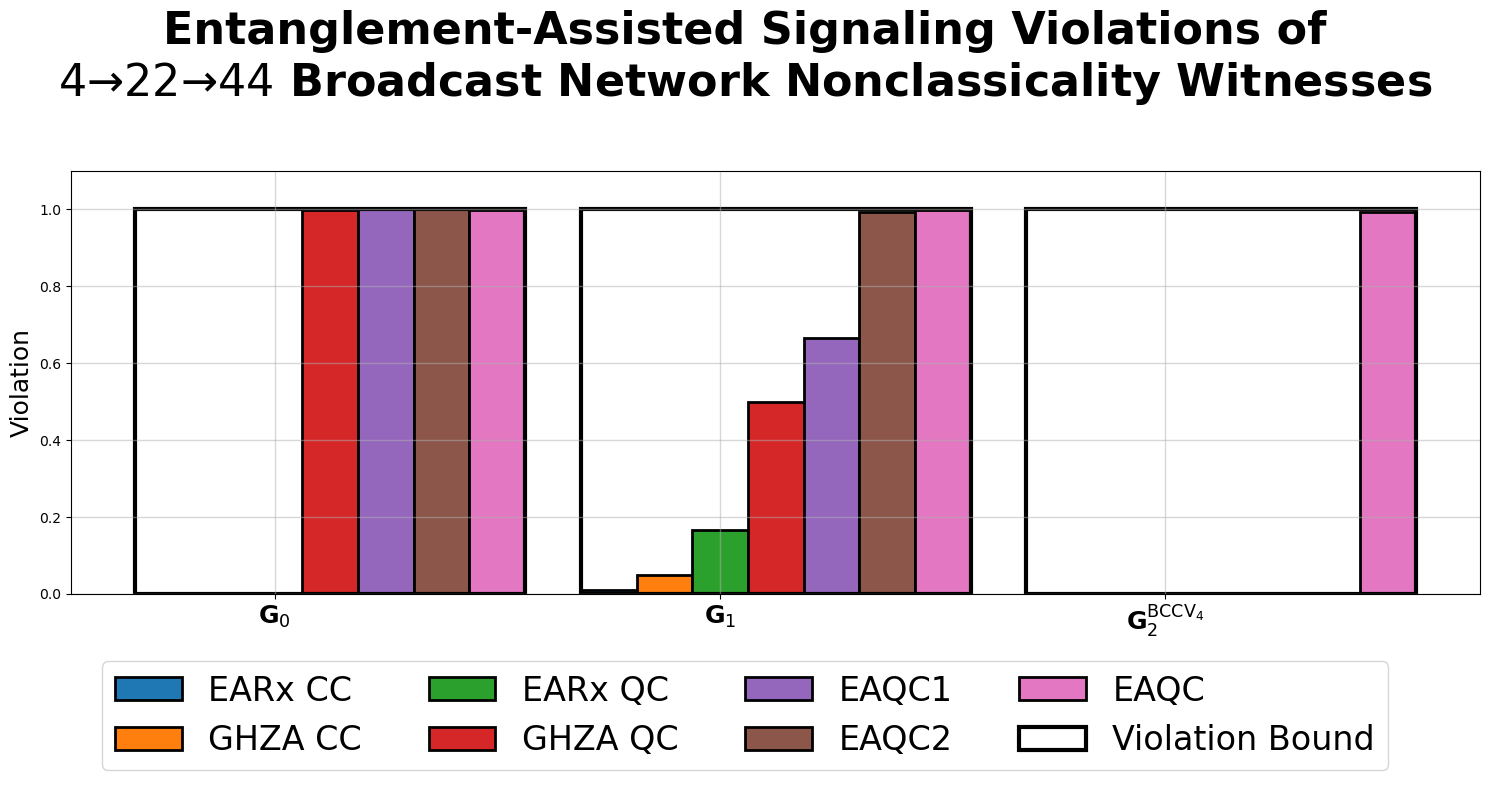

In [50]:
x_axis = np.arange(3)
x_labels = [r"$\mathbf{G}_0$",r"$\mathbf{G}_1$",r"$\mathbf{G}_2^{\rm{BCCV}_4}$"]
width = 1/8

fig, ax1 = plt.subplots(figsize=(15, 8), ncols=1,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)


# ax1.bar(x_axis-1*width, qbc_arb_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)

# ax1.bar(x_axis-0*width, eacc_bc_arb_max_violations, width=width, label="EACC", edgecolor="black",linewidth=2)
ax1.bar(x_axis-2*width, earx_cc_bc_arb_max_violations, width=width, label="EARx CC", edgecolor="black",linewidth=2)
ax1.bar(x_axis-1*width, ghza_cc_bc_arb_max_violations, width=width, label="GHZA CC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qc_bc_arb_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax1.bar(x_axis+1*width, ghza_qc_bc_arb_max_violations, width=width, label="GHZA QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+2*width, onesided_eaqc_bc_arb_max_violations, width=width, label="EAQC1", edgecolor="black",linewidth=2)
ax1.bar(x_axis+3*width, onesided2_eaqc_bc_arb_max_violations, width=width, label="EAQC2", edgecolor="black",linewidth=2)

ax1.bar(x_axis+4*width, eaqc_bc_arb_max_violations, width=width, label="EAQC", edgecolor="black",linewidth=2)





# ax1.bar(x_axis-0*width, onesided2_eaqc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+1*width, eacc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, ghzaqc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+1*width, onesided_eaqc_bc_sep_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)

# ax1.bar(x_axis+1*width, earx_qc_bc_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)





plt.bar(x_axis+1*width, [1]*len(qbc_arb_qbounds), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)

plt.figlegend(loc="lower center", ncols = 4, fontsize=24)


ax1.set_xticks(x_axis, x_labels, fontsize=18)#, rotation=60)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Entanglement-Assisted Signaling Violations of\n" + r"$4\to 22\to 44$ Broadcast Network Nonclassicality Witnesses" + "\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)

plt.show()

/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_2779/826063567.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + configuration_names, fontsize=32)
/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_2779/826063567.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels([""] + configuration_names3, fontsize=32)
/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_2779/826063567.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


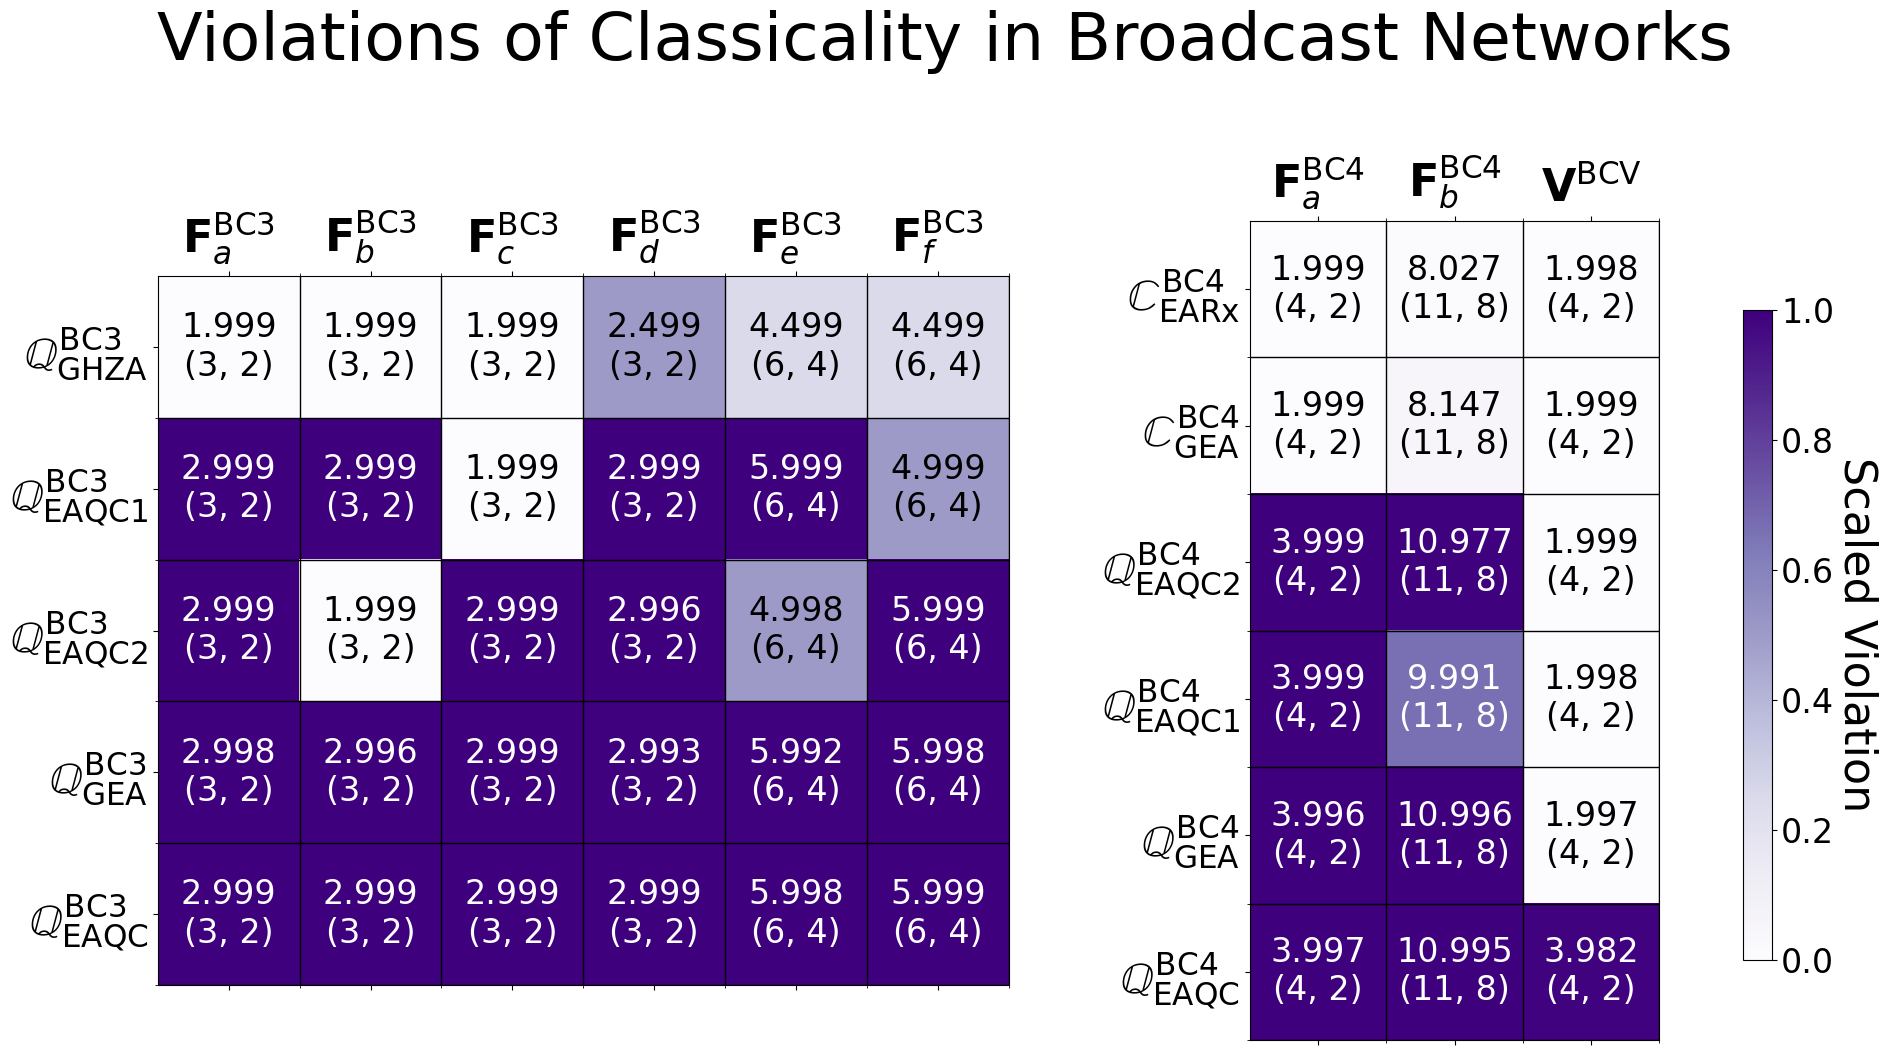

In [90]:
import matplotlib as mpl

fig, (ax3, ax) = plt.subplots(nrows=1, ncols=2, figsize=(19,10))

fig.suptitle("Violations of Classicality in Broadcast Networks", size=48, y=1.05)

configuration_names = [
    r"$\mathbb{C}^{\rm{BC4}}_{\rm{EARx}}$",
    r"$\mathbb{C}^{\rm{BC4}}_{\rm{GEA}}$",
    r"$\mathbb{Q}^{\rm{BC4}}_{\rm{EAQC2}}$",
    r"$\mathbb{Q}^{\rm{BC4}}_{\rm{EAQC1}}$",
    r"$\mathbb{Q}^{\rm{BC4}}_{\rm{GEA}}$",
    r"$\mathbb{Q}^{\rm{BC4}}_{\rm{EAQC}}$",
]

configuration_names3 = [
    r"$\mathbb{Q}^{\rm{BC3}}_{\rm{GHZA}}$",
    r"$\mathbb{Q}^{\rm{BC3}}_{\rm{EAQC1}}$",
    r"$\mathbb{Q}^{\rm{BC3}}_{\rm{EAQC2}}$",
    r"$\mathbb{Q}^{\rm{BC3}}_{\rm{GEA}}$",
    r"$\mathbb{Q}^{\rm{BC3}}_{\rm{EAQC}}$",
]
game_names = [r"$\mathbf{F}^{\rm{BC4}}_a$", r"$\mathbf{F}^{\rm{BC4}}_b$",r"$\mathbf{V}^{\rm{BCV}}$"]
game_names3 = [r"$\mathbf{F}^{\rm{BC}3}_a$",
               r"$\mathbf{F}^{\rm{BC}3}_b$",
               r"$\mathbf{F}^{\rm{BC}3}_c$",
               r"$\mathbf{F}^{\rm{BC}3}_d$",
               r"$\mathbf{F}^{\rm{BC}3}_e$",
               r"$\mathbf{F}^{\rm{BC}3}_f$"]


cc_table_data = np.array([
    earx_cc_bc_arb_cbounds,
    ghza_cc_bc_arb_cbounds,
    onesided2_eaqc_bc_arb_cbounds,
    onesided_eaqc_bc_arb_cbounds,
    gea_qc_bc_arb_cbounds,
    eaqc_bc_arb_cbounds,
])
cc_table_data3 = np.array([
    ghza_qc_bc_arb_cbounds3,
    onesided_eaqc_bc_arb_cbounds3,
    onesided2_eaqc_bc_arb_cbounds3,
    gea_qc_bc_arb_cbounds3,
    eaqc_bc_arb_cbounds3,
])


violation_table_data = np.array([
    earx_cc_bc_arb_max_violations,
    ghza_cc_bc_arb_max_violations,
    onesided2_eaqc_bc_arb_max_violations,
    onesided_eaqc_bc_arb_max_violations,
    gea_qc_bc_arb_max_violations,
    eaqc_bc_arb_max_violations,
])
violation_table_data3 = np.array([
    ghza_qc_bc_arb_max_violations3,
    onesided_eaqc_bc_arb_max_violations3,
    onesided2_eaqc_bc_arb_max_violations3,
    gea_qc_bc_arb_max_violations3,
    eaqc_bc_arb_max_violations3,
])

unscaled_violation_table_data = np.array([
    unscaled_earx_cc_bc_arb_max_violations,
    unscaled_ghza_cc_bc_arb_max_violations,
    unscaled_onesided2_eaqc_bc_arb_max_violations,
    unscaled_onesided_eaqc_bc_arb_max_violations,
    unscaled_gea_qc_bc_arb_max_violations,
    unscaled_eaqc_bc_arb_max_violations,
])

unscaled_violation_table_data3 = np.array([
    unscaled_ghza_qc_bc_arb_max_violations3,
    unscaled_onesided_eaqc_bc_arb_max_violations3,
    unscaled_onesided2_eaqc_bc_arb_max_violations3,
    unscaled_gea_qc_bc_arb_max_violations3,
    unscaled_eaqc_bc_arb_max_violations3,
])

max_table_data = np.array([
    earx_cc_bc_arb_qbounds,
    ghza_cc_bc_arb_qbounds,
    onesided2_eaqc_bc_arb_qbounds,
    onesided_eaqc_bc_arb_qbounds,
    gea_qc_bc_arb_qbounds,
    eaqc_bc_arb_qbounds,
])

max_table_data3 = np.array([
    ghza_qc_bc_arb_qbounds3,
    onesided_eaqc_bc_arb_qbounds3,
    onesided2_eaqc_bc_arb_qbounds3,
    gea_qc_bc_arb_qbounds3,
    eaqc_bc_arb_qbounds3,
])


# color bar and plotting colored data
color_map_name = "Purples"
pcm = ax.matshow(violation_table_data, cmap=mpl.colormaps[color_map_name], vmax=1, vmin=0)
pcm3 = ax3.matshow(violation_table_data3, cmap=mpl.colormaps[color_map_name], vmax=1, vmin=0)


ax.set_yticks([y + 0.5 for y in range(0, len(configuration_names))], minor=True)

ax.set_xticks([x + 0.5 for x in range(0, len(game_names))], minor=True)
ax.set_xticks([x for x in range(0, len(game_names))], minor=False)
ax.grid(which="minor", ls="-", lw=1, color="black")
ax.set_xticklabels(game_names, fontsize=32)
ax.set_yticklabels([""] + configuration_names, fontsize=32)



ax3.set_yticks([y + 0.5 for y in range(0, len(configuration_names3))], minor=True)

ax3.set_xticks([x + 0.5 for x in range(0, len(game_names3))], minor=True)
ax3.set_xticks([x for x in range(0, len(game_names3))], minor=False)
ax3.grid(which="minor", ls="-", lw=1, color="black")
ax3.set_xticklabels(game_names3, fontsize=32)
ax3.set_yticklabels([""] + configuration_names3, fontsize=32)

mat_num_font=24
text_color_threshold = 0.65

import decimal
decimal.getcontext().rounding = decimal.ROUND_DOWN
n_decimals = 3

for y in range(len(cc_table_data)):
    for x in range(len(cc_table_data[0])):

        cc_val = cc_table_data[y][x]
        violation_val = violation_table_data[y][x]
        max_val = max_table_data[y][x]
        unscaled_violation_val = unscaled_violation_table_data[y][x]

        text_color = "white" if violation_val >= text_color_threshold else "black"

        ax.text(x, y, str(round(decimal.Decimal(unscaled_violation_val), n_decimals)) + "\n(" + str(int(max_val)) + ", " + str(int(cc_val)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=text_color
        )

for y in range(len(cc_table_data3)):
    for x in range(len(cc_table_data3[0])):

        cc_val3 = cc_table_data3[y][x]
        violation_val3 = violation_table_data3[y][x]
        max_val3 = max_table_data3[y][x]
        unscaled_violation_val3 = unscaled_violation_table_data3[y][x]

        text_color = "white" if violation_val3 >= text_color_threshold else "black"


        ax3.text(x, y, str(round(decimal.Decimal(unscaled_violation_val3), n_decimals)) + "\n(" + str(int(max_val3)) + ", " + str(int(cc_val3)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=text_color
        )
       


cb_ax = fig.add_axes([0.92, 0.1, 0.015, 0.65])
cbar = fig.colorbar(pcm, cax=cb_ax)
cbar.ax.set_ylabel('Scaled Violation', rotation=270, size=32, labelpad=32)
cbar.ax.tick_params(labelsize=mat_num_font)

plt.tight_layout()

In [52]:
mac.rac_game(3)

ImportError: autoray couldn't find function 'comb' for backend 'builtins'.